In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as pl
import seaborn as sb
%matplotlib inline

In [2]:
data_train=pd.read_csv('data_train_processed.csv')

In [3]:
data_train=data_train.iloc[:,1:]

In [4]:
data_train.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,...,Total_Stops,Price,Duration_Hours,Duration_Min,Day_Of_Journey,Month_Of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,1,0,0,0,0,0,0,0,0,...,0,3897,2,50,24,3,22,20,1,10
1,0,0,0,0,0,0,1,0,1,0,...,2,7662,7,25,1,5,5,50,13,15
2,1,0,0,0,0,1,0,0,0,0,...,2,13882,19,0,9,6,9,25,4,25
3,0,0,0,0,0,0,1,0,0,0,...,1,6218,5,25,12,5,18,5,23,30
4,0,1,0,0,0,0,0,0,0,0,...,1,13302,4,45,1,3,16,50,21,35


In [5]:
data_train.columns

Index(['Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Total_Stops', 'Price', 'Duration_Hours', 'Duration_Min',
       'Day_Of_Journey', 'Month_Of_Journey', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [6]:
X=data_train.loc[:,['Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Total_Stops','Duration_Hours', 'Duration_Min',
       'Day_Of_Journey', 'Month_Of_Journey', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min']]


In [7]:
y=data_train.loc[:,['Price']]
np.reshape(np.array(y),(10681,))
y=np.ravel(y)

In [8]:
from sklearn.ensemble import ExtraTreesRegressor

In [9]:
sel=ExtraTreesRegressor()

In [10]:
sel.fit(X,y)

ExtraTreesRegressor()

In [11]:
print(sel.feature_importances_)

[8.22122214e-03 1.87219533e-02 6.91028218e-03 7.59726724e-04
 7.94063769e-04 9.02424021e-03 4.52730105e-03 9.12592765e-03
 8.88625132e-03 1.76317843e-03 1.36166270e-02 1.36611588e-01
 6.68364663e-02 2.04234140e-02 9.11331162e-04 5.30410263e-03
 1.26596145e-04 4.76129293e-03 8.42828699e-05 2.73539861e-01
 9.70645378e-02 1.85287908e-02 1.41419661e-01 5.93147892e-02
 2.35310453e-02 2.12547729e-02 2.87846272e-02 1.91520666e-02]


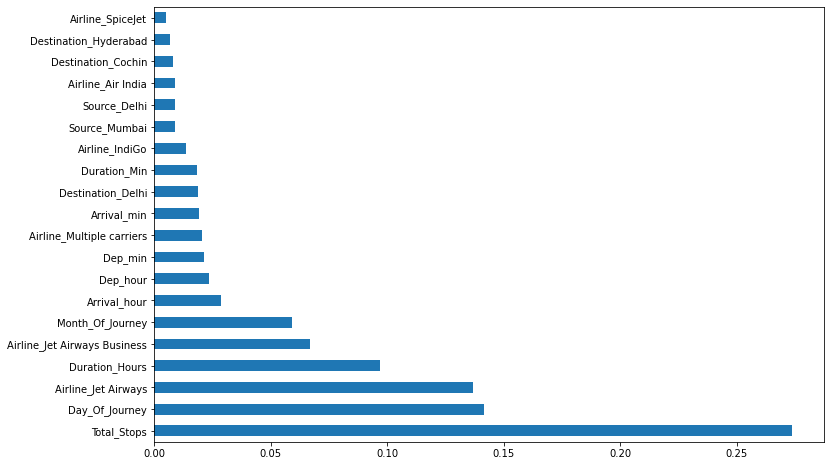

In [12]:
pl.figure(figsize = (12,8))
feat_importances = pd.Series(sel.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
pl.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rfr=RandomForestRegressor()

In [17]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
y_pred=rfr.predict(X_test)

In [19]:
rfr.score(X_train,y_train)

0.9533038215950539

In [20]:
rfr.score(X_test,y_test)

0.7985761050840459

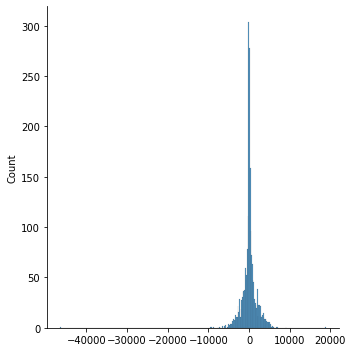

In [21]:
sb.displot(y_pred-y_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
print(f"mse:{mean_absolute_error(y_test,y_pred)}")
print(f"mse:{mean_squared_error(y_test,y_pred)}")

mse:1153.8362874024406
mse:4224368.752533666


In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 1300, num = 14)]
# Number of features to consider at every split
max_features = ['auto', 'log']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,25]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [27]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [28]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.1s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.1s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.1s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.2s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=741; total time=   8.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=741; total time=   7.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'log'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              25],
                                        'n_estimators': [90, 183, 276, 369, 462,
                                                         555, 648, 741, 834,
                                                         927, 1020, 1113, 1206,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 648,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [30]:
rfr_new=rf_random.best_estimator_

In [31]:
rfr_new.score(X_test,y_test)

0.81254967982948

In [32]:
pred=rfr_new.predict(X_test)

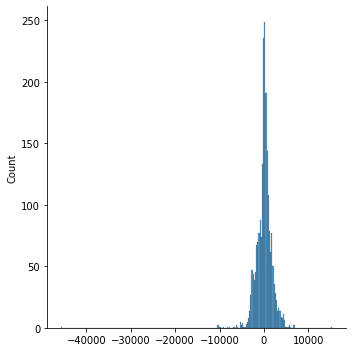

In [33]:
sb.displot(pred-y_test)

In [34]:
print(mean_absolute_error(pred,y_test))
print(mean_squared_error(pred,y_test))

1218.074985422842
3931307.531865503


In [35]:
import pickle as pk
pk.dump(rfr_new,open('model_save','wb'))

In [36]:
X.columns


Index(['Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Total_Stops', 'Duration_Hours', 'Duration_Min', 'Day_Of_Journey',
       'Month_Of_Journey', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')